In [1]:
import os
import numpy as np
import pandas as pd
from congress import Congress
import datetime as DT
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression #machine learning module - recomended
from sklearn import metrics
import statsmodels.api as sm
os.chdir('/home/polichinel/Dropbox/KU/8. semester/TSDS/eks/Project_tsds/Asger_n_Simon')

/home/polichinel/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Loading data

In [2]:
drop_list = ['member1_id','member2_id','fullname_1','fullname_2','twitter_account_1','twitter_account_2','party_x','party_y']

df_dem = pd.read_csv('df_dem_final_woZero.csv',delimiter=',', index_col =0)
df_dem = df_dem.drop(drop_list, axis=1)

df_rep = pd.read_csv('df_rep_final_woZero.csv',delimiter=',', index_col =0)
df_rep = df_rep.drop(drop_list, axis=1)

df_all = pd.read_csv('df_all_final_woZero.csv',delimiter=',', index_col =0)
df_all = df_all.drop(drop_list, axis=1)

In [3]:
# Reading this data for statistics.
df_dem_raw = pd.read_csv('df_dem_final_raw.csv',delimiter=',', index_col =0)
df_dem_raw = df_dem_raw.drop(drop_list, axis=1)

df_rep_raw = pd.read_csv('df_rep_final_raw.csv',delimiter=',', index_col =0)
df_rep_raw = df_rep_raw.drop(drop_list, axis=1)

df_all_raw = pd.read_csv('df_all_final_raw.csv',delimiter=',', index_col =0)
df_all_raw = df_all_raw.drop(drop_list, axis=1)

## Statistic for the democrats

In [4]:
df_dem_raw.head()

,agree_percent,same_gender,same_age,same_state,neighborState,distance
0,95.79,1,0,0,0,50.126964
1,96.37,0,0,0,0,39.737375
2,93.67,1,0,0,0,43.074248
3,92.16,0,0,0,0,10.570002
4,95.56,1,0,0,0,39.873279


In [5]:
df_dem.describe()

# Without zeroes: 7,865
# With zeroes: 12,720

,agree_percent,same_gender,same_age,same_state,neighborState,distance,ademic,jaccard
count,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000
mean,92.691760,0.568722,0.430261,0.036999,0.091926,25.862982,4.294222,0.210596
std,3.616428,0.495286,0.495144,0.188772,0.288940,17.494997,3.279432,0.130556
min,75.090000,0.000000,0.000000,0.000000,0.000000,0.092775,0.000000,0.000000
25%,91.410000,0.000000,0.000000,0.000000,0.000000,11.325787,1.525853,0.093333
50%,93.620000,1.000000,0.000000,0.000000,0.000000,23.683439,3.780111,0.205128
75%,95.060000,1.000000,1.000000,0.000000,0.000000,41.212586,6.369449,0.299065
max,98.640000,1.000000,1.000000,1.000000,1.000000,89.649081,25.575065,0.782609


In [6]:
len(df_dem_raw)

17955

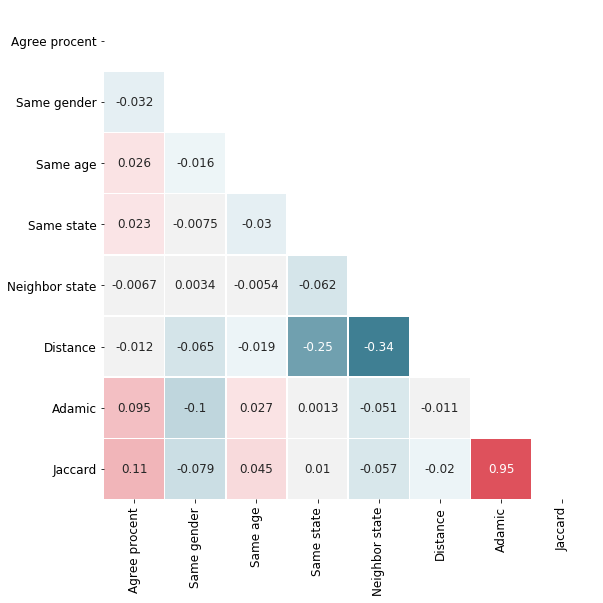

In [49]:
# Generate a mask for the upper triangle
corr = df_dem.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

xticks = ['Agree procent','Same gender', 'Same age', 'Same state', 'Neighbor state', 'Distance','Adamic', 'Jaccard']
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, annot_kws={"size": 12}, xticklabels=xticks,  yticklabels=xticks,
            square=True, linewidths=.5, cbar=None)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()
plt.savefig('heatmap_dem.pdf', bbox_inches="tight")

### Statistic for the republicans

In [8]:
df_rep_raw.describe()

# With zero: 13,777
#With out: 20.555
# Number of zeroes: 

,agree_percent,same_gender,same_age,same_state,neighborState,distance
count,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000
mean,92.907410,0.831882,0.498575,0.036902,0.106272,16.170486
std,4.704861,0.373979,0.500008,0.188525,0.308191,11.580626
min,17.650000,0.000000,0.000000,0.000000,0.000000,0.240274
25%,91.680000,1.000000,0.000000,0.000000,0.000000,7.933741
50%,93.790000,1.000000,0.000000,0.000000,0.000000,13.239355
75%,95.550000,1.000000,1.000000,0.000000,0.000000,21.449163
max,100.000000,1.000000,1.000000,1.000000,1.000000,85.170404


In [9]:
len(df_rep_raw)

25256

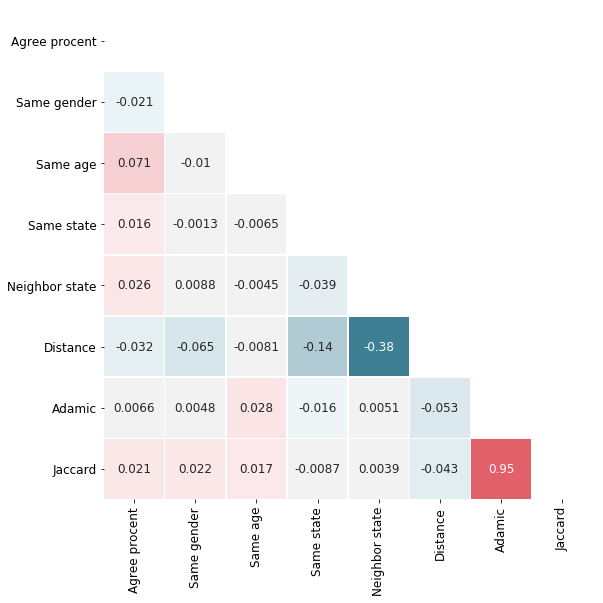

In [50]:
# Generate a mask for the upper triangle
corr = df_rep.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

xticks = ['Agree procent','Same gender', 'Same age', 'Same state', 'Neighbor state', 'Distance','Adamic', 'Jaccard']
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, annot_kws={"size": 12}, xticklabels=xticks,  yticklabels=xticks,
            square=True, linewidths=.5, cbar=None)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()
plt.savefig('heatmap_rep.pdf', bbox_inches="tight")

### Statistic for the ALL

In [11]:
df_all_raw.describe()

# With zero: 13,777
#With out: 20.555
# Number of zeroes: 

,agree_percent,same_gender,same_age,same_state,neighborState,distance
count,111639.000000,111639.000000,111639.000000,111639.000000,111639.000000,111639.000000
mean,61.115036,0.682271,0.466432,0.043883,0.086403,19.832399
std,32.550931,0.465596,0.498874,0.204835,0.280960,14.101352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.030100
25%,27.860000,0.000000,0.000000,0.000000,0.000000,9.082732
50%,62.000000,1.000000,0.000000,0.000000,0.000000,15.823905
75%,94.100000,1.000000,1.000000,0.000000,0.000000,29.215007
max,100.000000,1.000000,1.000000,1.000000,1.000000,92.022422


In [12]:
len(df_all_raw)

111639

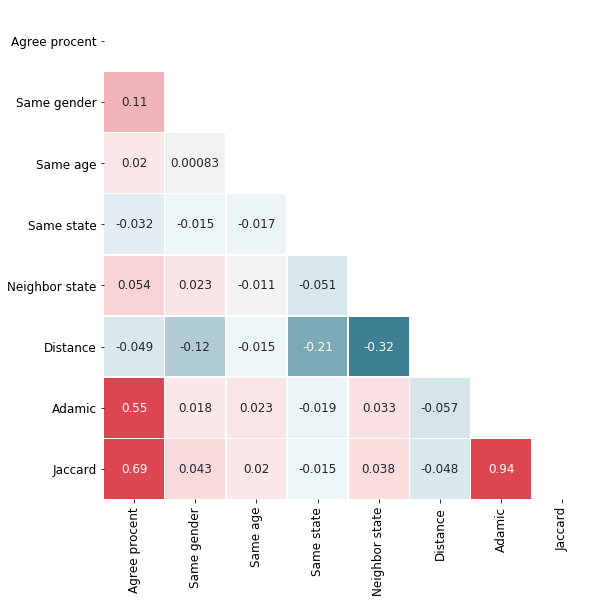

In [51]:
# Generate a mask for the upper triangle
corr = df_all.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

xticks = ['Agree procent','Same gender', 'Same age', 'Same state', 'Neighbor state', 'Distance','Adamic', 'Jaccard']
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, annot_kws={"size": 12}, xticklabels=xticks,  yticklabels=xticks,
            square=True, linewidths=.5, cbar=None)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()
plt.savefig('heatmap_all.pdf', bbox_inches="tight")

# Prediction

In [14]:
df_train_rep = df_rep.copy()
df_train_dem = df_dem.copy()
df_train_all = df_all.copy()

df_train_rep.head()

,agree_percent,same_gender,same_age,same_state,neighborState,distance,ademic,jaccard
135,94.76,1,0,0,0,24.256553,6.723549,0.190184
144,92.42,1,0,0,0,44.719594,1.527412,0.046053
147,93.66,1,0,1,0,1.554337,0.189098,0.006579
153,89.14,1,1,0,0,43.222027,15.072495,0.425000
156,93.95,1,1,0,0,26.963132,1.024994,0.031847


In [15]:
# # Rescaling the data
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_train_rep[['agree_percent']] =scaler.fit_transform(df_train_rep[['agree_percent']])
# df_train_dem[['agree_percent']] =scaler.fit_transform(df_train_dem[['agree_percent']])

In [16]:
X_vars = df_train_dem.columns[1:]

#Defining X and y for dem
X_dem = df_train_dem[X_vars]
y_dem = df_train_dem.agree_percent

#Defining X and y for rep
X_rep = df_train_rep[X_vars]
y_rep = df_train_rep.agree_percent

#Defining X and y for all
X_all = df_train_all[X_vars]
y_all = df_train_all.agree_percent

## Freature importance with random forrest

In [17]:
clf_rf = RandomForestRegressor(max_depth=5, random_state=0)
clf_rf.fit(X_dem, y_dem)

importances = clf_rf.feature_importances_
names = X_dem.columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_dem.shape[1]):  
    print("%d. %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))

Feature ranking:
1. distance (0.492917)
2. jaccard (0.277466)
3. ademic (0.164694)
4. same_age (0.031431)
5. neighborState (0.019179)
6. same_state (0.011925)
7. same_gender (0.002388)


In [18]:
clf_rf.fit(X_rep, y_rep)

importances = clf_rf.feature_importances_
names = X_dem.columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_dem.shape[1]):  
    print("%d. %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))

Feature ranking:
1. jaccard (0.393683)
2. ademic (0.258071)
3. distance (0.250092)
4. same_age (0.076896)
5. same_gender (0.013279)
6. neighborState (0.007980)
7. same_state (0.000000)


In [19]:
clf_rf.fit(X_all, y_all)

importances = clf_rf.feature_importances_
names = X_dem.columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_dem.shape[1]):  
    print("%d. %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))

Feature ranking:
1. jaccard (0.813139)
2. ademic (0.186521)
3. same_state (0.000337)
4. same_age (0.000003)
5. distance (0.000000)
6. neighborState (0.000000)
7. same_gender (0.000000)


## Estimation with OLS

In [20]:
df_rep_var = df_rep.drop(['ademic'], axis=1).copy()
df_dem_var = df_dem.drop(['ademic'], axis=1).copy()
df_all_var = df_all.drop(['ademic'], axis=1).copy()
# df_rep_var = df_rep.drop(['jaccard'], axis=1).copy()
# df_dem_var = df_dem.drop(['jaccard'], axis=1).copy()
# df_all_var = df_all.drop(['jaccard'], axis=1).copy()
df_rep_var['const']=1 
df_dem_var['const']=1 
df_all_var['const']=1 

X_vars = df_rep_var.columns[1:]

#Defining X and y for dem
X_dem = df_dem_var[X_vars]
y_dem = df_dem_var.agree_percent

#Defining X and y for rep
X_rep = df_rep_var[X_vars]
y_rep = df_rep_var.agree_percent

#Defining X and y for rep
X_all = df_all_var[X_vars]
y_all = df_all_var.agree_percent

In [21]:
# Results for democrats
results = sm.OLS(y_dem, X_dem).fit()
print(results.summary())

# Jaccard not significant :(

                            OLS Regression Results                            
Dep. Variable:          agree_percent   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     19.54
Date:                Sat, 26 May 2018   Prob (F-statistic):           9.33e-23
Time:                        21:39:51   Log-Likelihood:                -21212.
No. Observations:                7865   AIC:                         4.244e+04
Df Residuals:                    7858   BIC:                         4.249e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
same_gender      -0.1687      0.082     -2.051

In [22]:
# Results for democrats
results = sm.OLS(y_rep, X_rep).fit()
print(results.summary())

# Jaccard not significant :(

                            OLS Regression Results                            
Dep. Variable:          agree_percent   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     16.82
Date:                Sat, 26 May 2018   Prob (F-statistic):           1.93e-19
Time:                        21:39:51   Log-Likelihood:                -40185.
No. Observations:               13777   AIC:                         8.038e+04
Df Residuals:                   13770   BIC:                         8.044e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
same_gender      -0.2800      0.106     -2.637

In [23]:
# Results for ALL
results = sm.OLS(y_all, X_all).fit()
print(results.summary())

# Jaccard not significant :(

                            OLS Regression Results                            
Dep. Variable:          agree_percent   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 1.092e+04
Date:                Sat, 26 May 2018   Prob (F-statistic):               0.00
Time:                        21:39:51   Log-Likelihood:            -3.1978e+05
No. Observations:               70208   AIC:                         6.396e+05
Df Residuals:                   70201   BIC:                         6.396e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
same_gender       5.2278      0.187     27.909

# Prediction with binary variable

In [24]:
df_rep_bi = df_rep.copy()
df_dem_bi = df_dem.copy()
df_all_bi = df_all.copy()

df_dem_bi['agree_percent'] = np.where(df_dem_bi.agree_percent>93.82,1,0) # Over median
df_rep_bi['agree_percent'] = np.where(df_rep_bi.agree_percent>93.87,1,0) # Over median
df_all_bi['agree_percent'] = np.where(df_all_bi.agree_percent>54.8,1,0) # Over median

df_dem_bi = df_dem_bi.drop(['ademic'], axis=1)
df_rep_bi = df_rep_bi.drop(['ademic'], axis=1)
df_all_bi = df_all_bi.drop(['ademic'], axis=1)

# df_dem_bi = df_dem_bi.drop(['jaccard'], axis=1)
# df_rep_bi = df_rep_bi.drop(['jaccard'], axis=1)
# df_all_bi = df_all_bi.drop(['jaccard'], axis=1)

df_dem_bi.head()

,agree_percent,same_gender,same_age,same_state,neighborState,distance,jaccard
0,1,1,0,0,0,50.126964,0.329545
13,1,0,1,0,0,21.329847,0.358696
23,1,0,0,0,0,49.268000,0.260274
26,0,0,0,0,0,45.702193,0.220930
29,1,1,0,0,0,50.007473,0.065574


In [25]:
msk_dem = np.random.rand(len(df_dem_bi)) < 0.8
train_dem = df_dem_bi[msk_dem]
test_dem = df_dem_bi[~msk_dem]
print(len(train_dem), len(test_dem))

msk_rep = np.random.rand(len(df_rep_bi)) < 0.8
train_rep = df_rep_bi[msk_rep]
test_rep = df_rep_bi[~msk_rep]
print(len(train_rep), len(test_rep))

msk_all = np.random.rand(len(df_all_bi)) < 0.8
train_all = df_all_bi[msk_all]
test_all = df_all_bi[~msk_all]
print(len(train_all), len(test_all))

6198 1667
11107 2670
56157 14051


In [26]:
X_vars = train_dem.columns[1:7]

#Democrats
X_train_dem = train_dem[X_vars]
y_train_dem = train_dem.agree_percent

X_test_dem = test_dem[X_vars]
y_test_dem = test_dem.agree_percent

#Republicans
X_train_rep = train_rep[X_vars]
y_train_rep = train_rep.agree_percent

X_test_rep = test_rep[X_vars]
y_test_rep = test_rep.agree_percent

#all
X_train_all = train_all[X_vars]
y_train_all = train_all.agree_percent

X_test_all = test_all[X_vars]
y_test_all = test_all.agree_percent

### Democrats

In [27]:
# Logistic regression on democrats
clf_lg = LogisticRegression().fit(X_train_dem, y_train_dem)
pred_log = clf_lg.predict(X_test_dem)
pred_proba_log = clf_lg.predict_proba(X_test_dem)[:,1]

matrix = metrics.confusion_matrix(y_test_dem,pred_log)
matrix = matrix/matrix.sum(axis=1) # divide by row counts

print("confusion matrix:",'\n', pd.DataFrame(matrix))
print("Accuracy:",metrics.accuracy_score(y_test_dem,pred_log))

confusion matrix: 
           0         1
0  0.815880  0.200501
1  0.696203  0.241855
Accuracy: 0.5410917816436712


In [28]:
# random forrest on democratss
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=5, random_state=0).fit(X_train_dem, y_train_dem)
pred_rf = clf_rf.predict(X_test_dem)
pred_proba_rf = clf_rf.predict_proba(X_test_dem)[:,1]

matrix = metrics.confusion_matrix(y_test_dem,pred_rf)
matrix = matrix/matrix.sum(axis=1) # divide by row counts

print("confusion matrix:",'\n', pd.DataFrame(matrix))
print("Accuracy :",metrics.accuracy_score(y_test_dem,pred_rf))

confusion matrix: 
           0         1
0  0.724971  0.299499
1  0.570771  0.378446
Accuracy : 0.5590881823635273


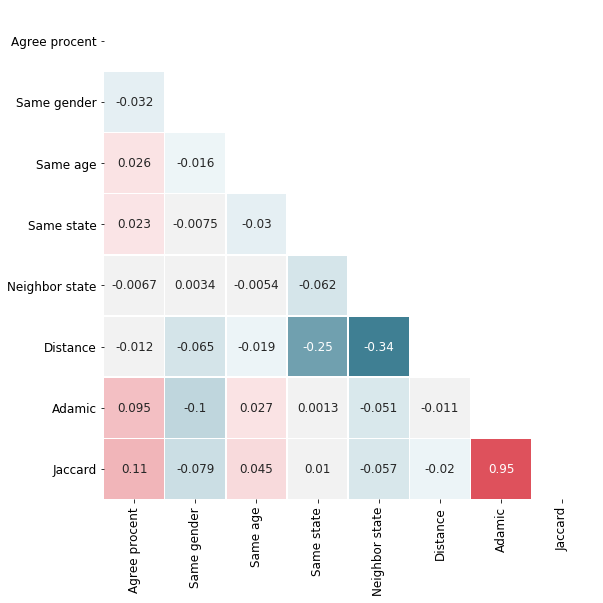

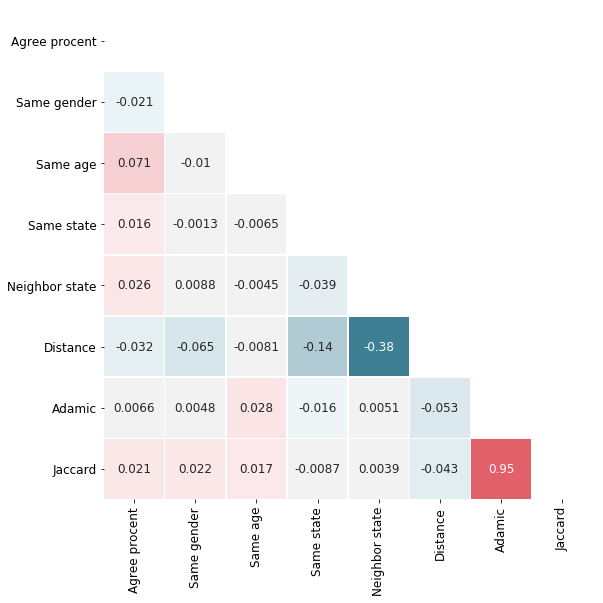

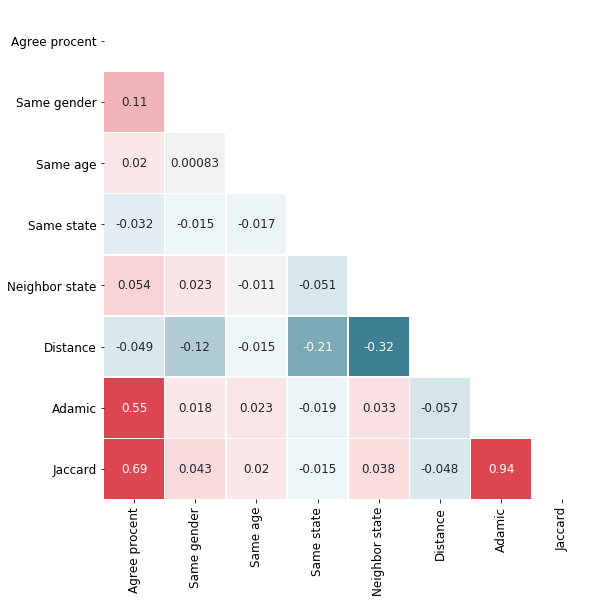

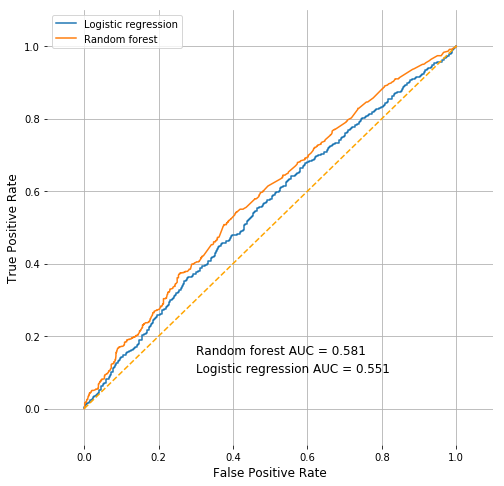

In [29]:
#Logistic regression
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test_dem, pred_proba_log)
auc1 = round(metrics.roc_auc_score(y_test_dem, pred_proba_log), 3)

#Random forrest
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test_dem, pred_proba_rf)
auc2 = round(metrics.roc_auc_score(y_test_dem, pred_proba_rf), 3)

plt.figure(figsize=[8,8])

plt.plot(fpr1, tpr1, label = "Logistic regression")
plt.plot(fpr2, tpr2, label = "Random forest")


plt.text(0.3,0.1,"Logistic regression AUC = " + str(auc1), fontsize = 12)
plt.text(0.3,0.15,"Random forest AUC = " + str(auc2), fontsize = 12)

plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), linestyle = "dashed", color = "orange")

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
#plt.title('ROC curve', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.grid(True)

plt.legend()
sns.despine(left=True, bottom= True)

plt.savefig('roc_dem.pdf', bbox_inches="tight")

plt.show()



### Republicans

In [30]:
# Logistic regression on republicans
clf_lg = LogisticRegression().fit(X_train_rep, y_train_rep)
pred_log = clf_lg.predict(X_test_rep)
pred_proba_log = clf_lg.predict_proba(X_test_rep)[:,1]

matrix = metrics.confusion_matrix(y_test_rep,pred_log)
matrix = matrix/matrix.sum(axis=1) # divide by row counts

print("confusion matrix: ",'\n', pd.DataFrame(matrix))
print("Accuracy nltk:",metrics.accuracy_score(y_test_rep,pred_log))

confusion matrix:  
           0         1
0  0.769986  0.263666
1  0.652875  0.251608
Accuracy nltk: 0.5284644194756555


In [31]:
# random forrest on repocratss
clf_rf = RandomForestClassifier(max_depth=5, random_state=0).fit(X_train_rep, y_train_rep)
pred_rf = clf_rf.predict(X_test_rep)
pred_proba_rf = clf_rf.predict_proba(X_test_rep)[:,1]

matrix = metrics.confusion_matrix(y_test_rep,pred_rf)
matrix = matrix/matrix.sum(axis=1) # divide by row counts

print("confusion matrix:",'\n', pd.DataFrame(matrix))
print("Accuracy:",metrics.accuracy_score(y_test_rep,pred_rf))

confusion matrix: 
           0         1
0  0.841515  0.181672
1  0.682328  0.217846
Accuracy: 0.550936329588015


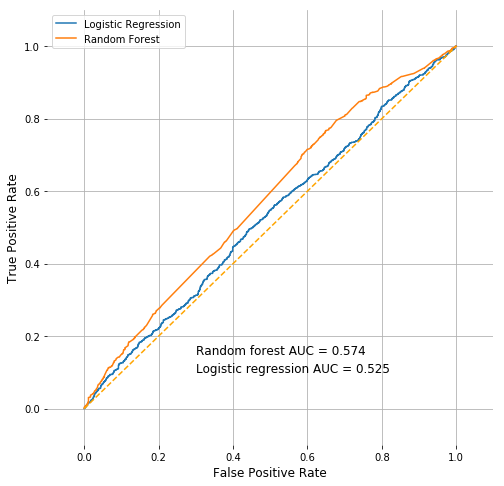

In [32]:
#Logistic regression
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test_rep, pred_proba_log)
auc1 = round(metrics.roc_auc_score(y_test_rep, pred_proba_log), 3)

#Random forrest
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test_rep, pred_proba_rf)
auc2 = round(metrics.roc_auc_score(y_test_rep, pred_proba_rf), 3)

plt.figure(figsize=[8,8])

plt.plot(fpr1, tpr1, label = "Logistic Regression")
plt.plot(fpr2, tpr2, label = "Random Forest")


plt.text(0.3,0.1,"Logistic regression AUC = " + str(auc1), fontsize = 12)
plt.text(0.3,0.15,"Random forest AUC = " + str(auc2), fontsize = 12)

plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), linestyle = "dashed", color = "orange")

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
#plt.title('ROC curve', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.grid(True)

plt.legend()
sns.despine(left=True, bottom= True)


plt.savefig('roc_rep.pdf', bbox_inches="tight")

plt.show()

### ALL

In [33]:
# Logistic regression on all
clf_lg = LogisticRegression().fit(X_train_all, y_train_all)
pred_log = clf_lg.predict(X_test_all)
pred_proba_log = clf_lg.predict_proba(X_test_all)[:,1]

matrix = metrics.confusion_matrix(y_test_all,pred_log)
matrix = matrix/matrix.sum(axis=1) # divide by row counts

print("confusion matrix:",'\n', pd.DataFrame(matrix))
print("Accuracy:",metrics.accuracy_score(y_test_all,pred_log))

confusion matrix: 
           0         1
0  0.948044  0.077482
1  0.170610  0.745567
Accuracy: 0.8667710483239627


In [34]:
# random forrest on allocratss
clf_rf = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train_all, y_train_all)
pred_rf = clf_rf.predict(X_test_all)
pred_proba_rf = clf_rf.predict_proba(X_test_all)[:,1]

matrix = metrics.confusion_matrix(y_test_all,pred_rf)
matrix = matrix/matrix.sum(axis=1) # divide by row counts

print("confusion matrix:",'\n', pd.DataFrame(matrix))
print("Accuracy:",metrics.accuracy_score(y_test_all,pred_rf))

confusion matrix: 
           0         1
0  0.926763  0.109220
1  0.106527  0.841135
Accuracy: 0.8923920005693545


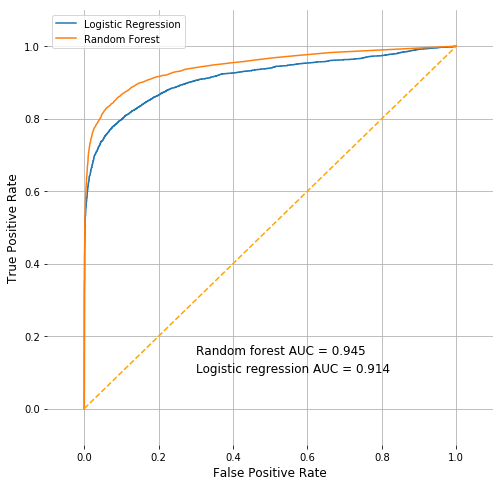

In [35]:
#Logistic regression
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test_all, pred_proba_log)
auc1 = round(metrics.roc_auc_score(y_test_all, pred_proba_log), 3)

#Random forrest
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test_all, pred_proba_rf)
auc2 = round(metrics.roc_auc_score(y_test_all, pred_proba_rf), 3)

plt.figure(figsize=[8,8])

plt.plot(fpr1, tpr1, label = "Logistic Regression")
plt.plot(fpr2, tpr2, label = "Random Forest")


plt.text(0.3,0.1,"Logistic regression AUC = " + str(auc1), fontsize = 12)
plt.text(0.3,0.15,"Random forest AUC = " + str(auc2), fontsize = 12)

plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), linestyle = "dashed", color = "orange")

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
#plt.title('ROC curve', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.grid(True)

plt.legend()
sns.despine(left=True, bottom= True)

plt.savefig('roc_all.pdf', bbox_inches="tight")

plt.show()

# "New" Jazz

In [36]:
from sklearn.model_selection import train_test_split

## HEAT MAPS:

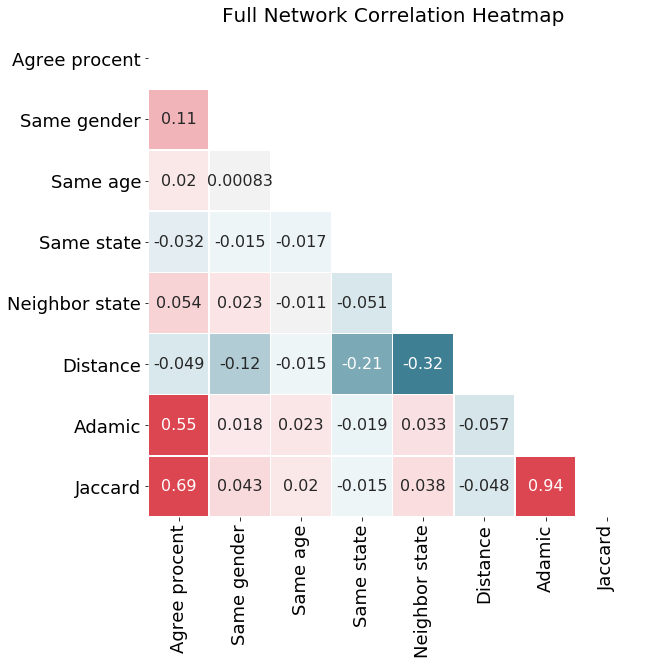

In [106]:
# Generate a mask for the upper triangle
corr = df_all.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

xticks = ['Agree procent','Same gender', 'Same age', 'Same state', 'Neighbor state', 'Distance','Adamic', 'Jaccard']
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, annot_kws={"size": 16}, xticklabels=xticks,  yticklabels=xticks,
            square=True, linewidths=.5, cbar=None)

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.title("Full Network Correlation Heatmap", fontsize = 20)

plt.savefig('heatmap_all_new.pdf', bbox_inches="tight")

plt.show()


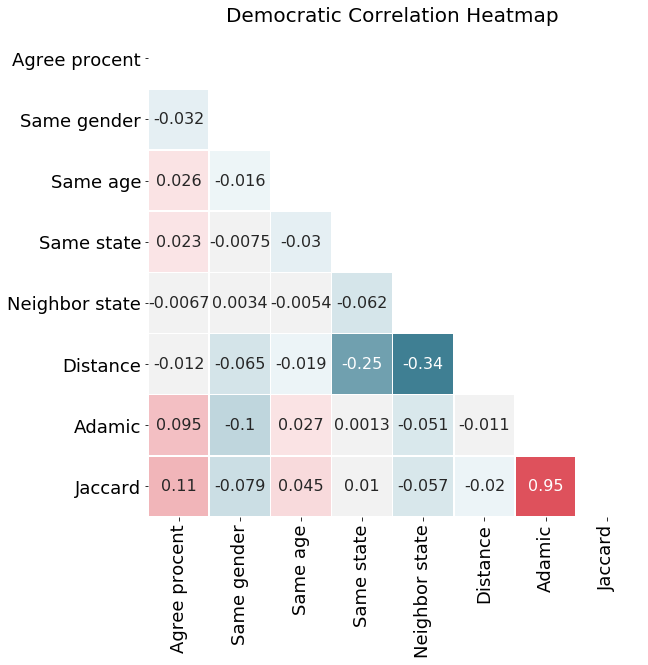

In [107]:
# Generate a mask for the upper triangle
corr = df_dem.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

xticks = ['Agree procent','Same gender', 'Same age', 'Same state', 'Neighbor state', 'Distance','Adamic', 'Jaccard']
yticks = ['Agree procent','Same gender', 'Same age', 'Same state', 'Neighbor state', 'Distance','Adamic', 'Jaccard']

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, annot_kws={"size": 16}, xticklabels=xticks,  yticklabels=yticks,
            square=True, linewidths=.5, cbar=None)

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.title("Democratic Correlation Heatmap", fontsize = 20)

plt.savefig('heatmap_dem_new.pdf', bbox_inches="tight")

plt.show()


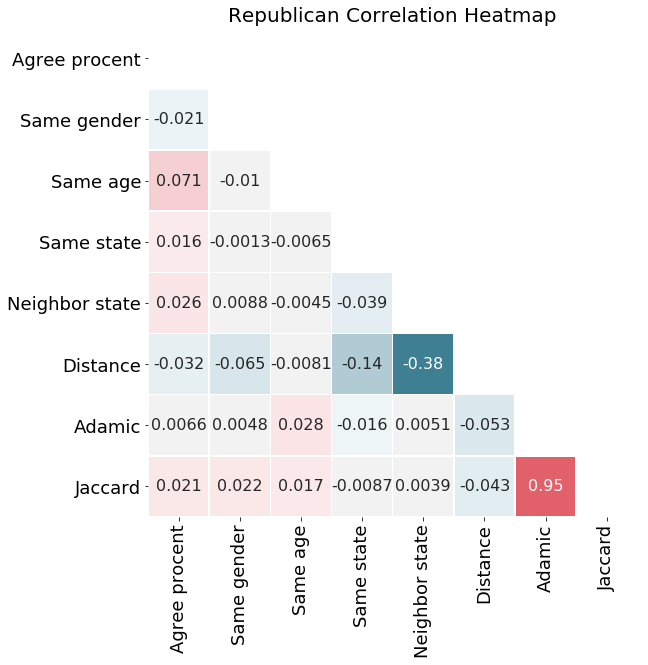

In [108]:
# Generate a mask for the upper triangle
corr = df_rep.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

xticks = ['Agree procent','Same gender', 'Same age', 'Same state', 'Neighbor state', 'Distance','Adamic', 'Jaccard']
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, annot_kws={"size": 16}, xticklabels=xticks,  yticklabels=xticks,
            square=True, linewidths=.5, cbar=None)

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.title("Republican Correlation Heatmap", fontsize = 20)


plt.savefig('heatmap_rep_new.pdf', bbox_inches="tight")
plt.show()


## ROC CURVES:

In [38]:
test_bi = np.where(df_rep.agree_percent>df_rep.agree_percent.median(),1,0) # Over median
test_bi

#df_rep_bi['agree_percent'] = np.where(df_rep_bi.agree_percent>93.87,1,0) # Over median
#df_all_bi['agree_percent'] = np.where(df_all_bi.agree_percent>54.8,1,0) # Over median

array([1, 0, 1, ..., 0, 1, 1])

In [39]:
# republicans:----------------------------------------
X_rep_allF = df_rep.iloc[:,1:] #all features
#y_rep = df_rep.iloc[:,:1]
y_rep = np.where(df_rep.agree_percent>df_rep.agree_percent.median(),1,0) # Binary over median

# all features
X_rep_allF_train, X_rep_allF_test, y_rep_train, y_rep_test = train_test_split(X_rep_allF,y_rep, test_size=0.20, random_state=123)

# only network features
X_rep_NF_train = X_rep_allF_train.iloc[:,5:]
X_rep_NF_test = X_rep_allF_test.iloc[:,5:]

# only oter features (not network)
X_rep_OF_train = X_rep_allF_train.iloc[:,:5]
X_rep_OF_test = X_rep_allF_test.iloc[:,:5]

# Democrates:-----------------------------------------
X_dem_allF = df_dem.iloc[:,1:] #all features
#y_dem = df_dem.iloc[:,:1]
y_dem = np.where(df_dem.agree_percent>df_dem.agree_percent.median(),1,0) # Binary over median

# all features
X_dem_allF_train, X_dem_allF_test, y_dem_train, y_dem_test = train_test_split(X_dem_allF,y_dem, test_size=0.20, random_state=123)

# only network features
X_dem_NF_train = X_dem_allF_train.iloc[:,5:]
X_dem_NF_test = X_dem_allF_test.iloc[:,5:]

# only oter features (not network)
X_dem_OF_train = X_dem_allF_train.iloc[:,:5]
X_dem_OF_test = X_dem_allF_test.iloc[:,:5]

# ALL:------------------------------------------------

X_all_allF = df_all.iloc[:,1:] #all features
#y_all = df_all.iloc[:,:1]
y_all = np.where(df_all.agree_percent>df_all.agree_percent.median(),1,0) # Binary over median

# all features
X_all_allF_train, X_all_allF_test, y_all_train, y_all_test = train_test_split(X_all_allF,y_all, test_size=0.20, random_state=123)

# only network features
X_all_NF_train = X_all_allF_train.iloc[:,5:]
X_all_NF_test = X_all_allF_test.iloc[:,5:]

# only oter features (not network)
X_all_OF_train = X_all_allF_train.iloc[:,:5]
X_all_OF_test = X_all_allF_test.iloc[:,:5]

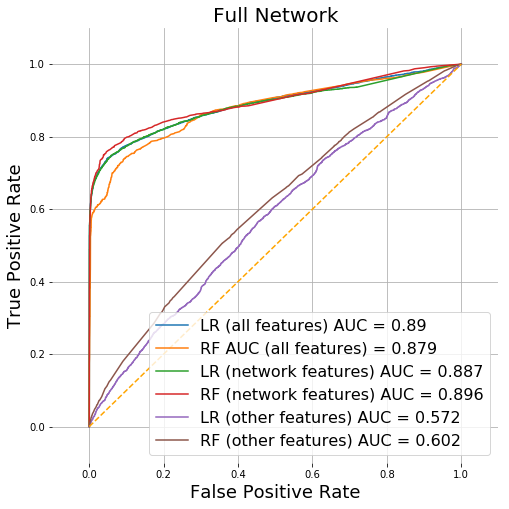

In [110]:
#ALL

# All features:------------------------------------------------------------------------------
clf_lg = LogisticRegression().fit(X_all_allF_train, y_all_train)
pred_log = clf_lg.predict(X_all_allF_test)
pred_proba_log = clf_lg.predict_proba(X_all_allF_test)[:,1]

clf_rf = RandomForestClassifier(max_depth=5, random_state=0).fit(X_all_allF_train, y_all_train)
pred_rf = clf_rf.predict(X_all_allF_test)
pred_proba_rf = clf_rf.predict_proba(X_all_allF_test)[:,1]

#Logistic regression
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_all_test, pred_proba_log)
auc1 = round(metrics.roc_auc_score(y_all_test, pred_proba_log), 3)

#Random forrest
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_all_test, pred_proba_rf)
auc2 = round(metrics.roc_auc_score(y_all_test, pred_proba_rf), 3)


# Network features: ----------------------------------------------------------------------------
clfN_lg = LogisticRegression().fit(X_all_NF_train, y_all_train)
predN_log = clfN_lg.predict(X_all_NF_test)
pred_probaN_log = clfN_lg.predict_proba(X_all_NF_test)[:,1]

clfN_rf = RandomForestClassifier(max_depth=5, random_state=0).fit(X_all_NF_train, y_all_train)
predN_rf = clfN_rf.predict(X_all_NF_test)
pred_probaN_rf = clfN_rf.predict_proba(X_all_NF_test)[:,1]

#Logistic regression
fprN1, tprN1, thresholdsN1 = metrics.roc_curve(y_all_test, pred_probaN_log)
aucN1 = round(metrics.roc_auc_score(y_all_test, pred_probaN_log), 3)

#Random forrest
fprN2, tprN2, thresholdsN2 = metrics.roc_curve(y_all_test, pred_probaN_rf)
aucN2 = round(metrics.roc_auc_score(y_all_test, pred_probaN_rf), 3)

# "Other" features: ----------------------------------------------------------------------------
clfO_lg = LogisticRegression().fit(X_all_OF_train, y_all_train)
predO_log = clfO_lg.predict(X_all_OF_test)
pred_probaO_log = clfO_lg.predict_proba(X_all_OF_test)[:,1]

clfO_rf = RandomForestClassifier(max_depth=5, random_state=0).fit(X_all_OF_train, y_all_train)
predO_rf = clfO_rf.predict(X_all_OF_test)
pred_probaO_rf = clfO_rf.predict_proba(X_all_OF_test)[:,1]

#Logistic regression
fprO1, tprO1, thresholdsO1 = metrics.roc_curve(y_all_test, pred_probaO_log)
aucO1 = round(metrics.roc_auc_score(y_all_test, pred_probaO_log), 3)

#Random forrest
fprO2, tprO2, thresholdsO2 = metrics.roc_curve(y_all_test, pred_probaO_rf)
aucO2 = round(metrics.roc_auc_score(y_all_test, pred_probaO_rf), 3)


plt.figure(figsize=[8,8])

plt.plot(fpr1, tpr1, label = "LR (all features) AUC = " + str(auc1))
plt.plot(fpr2, tpr2, label = "RF AUC (all features) = " + str(auc2))

plt.plot(fprN1, tprN1, label = "LR (network features) AUC = " + str(aucN1))
plt.plot(fprN2, tprN2, label = "RF (network features) AUC = " + str(aucN2))

plt.plot(fprO1, tprO1, label = "LR (other features) AUC = " + str(aucO1))
plt.plot(fprO2, tprO2, label = "RF (other features) AUC = " + str(aucO2))

plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), linestyle = "dashed", color = "orange")

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
#plt.title('ROC curve', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.grid(True)

plt.legend(fontsize = 16)
sns.despine(left=True, bottom= True)

plt.title("Full Network", fontsize = 20)

plt.savefig('roc_all_new.pdf', bbox_inches="tight")

plt.show()

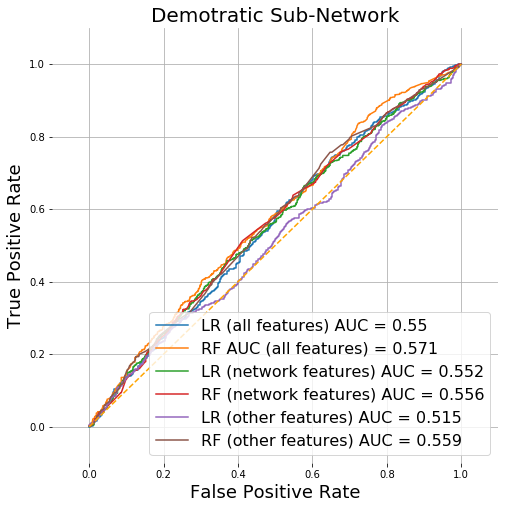

In [112]:
#DEM

# All features:------------------------------------------------------------------------------
clf_lg = LogisticRegression().fit(X_dem_allF_train, y_dem_train)
pred_log = clf_lg.predict(X_dem_allF_test)
pred_proba_log = clf_lg.predict_proba(X_dem_allF_test)[:,1]

clf_rf = RandomForestClassifier(max_depth=5, random_state=0).fit(X_dem_allF_train, y_dem_train)
pred_rf = clf_rf.predict(X_dem_allF_test)
pred_proba_rf = clf_rf.predict_proba(X_dem_allF_test)[:,1]

#Logistic regression
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_dem_test, pred_proba_log)
auc1 = round(metrics.roc_auc_score(y_dem_test, pred_proba_log), 3)

#Random forrest
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_dem_test, pred_proba_rf)
auc2 = round(metrics.roc_auc_score(y_dem_test, pred_proba_rf), 3)


# Network features: ----------------------------------------------------------------------------
clfN_lg = LogisticRegression().fit(X_dem_NF_train, y_dem_train)
predN_log = clfN_lg.predict(X_dem_NF_test)
pred_probaN_log = clfN_lg.predict_proba(X_dem_NF_test)[:,1]

clfN_rf = RandomForestClassifier(max_depth=5, random_state=0).fit(X_dem_NF_train, y_dem_train)
predN_rf = clfN_rf.predict(X_dem_NF_test)
pred_probaN_rf = clfN_rf.predict_proba(X_dem_NF_test)[:,1]

#Logistic regression
fprN1, tprN1, thresholdsN1 = metrics.roc_curve(y_dem_test, pred_probaN_log)
aucN1 = round(metrics.roc_auc_score(y_dem_test, pred_probaN_log), 3)

#Random forrest
fprN2, tprN2, thresholdsN2 = metrics.roc_curve(y_dem_test, pred_probaN_rf)
aucN2 = round(metrics.roc_auc_score(y_dem_test, pred_probaN_rf), 3)

# "Other" features: ----------------------------------------------------------------------------
clfO_lg = LogisticRegression().fit(X_dem_OF_train, y_dem_train)
predO_log = clfO_lg.predict(X_dem_OF_test)
pred_probaO_log = clfO_lg.predict_proba(X_dem_OF_test)[:,1]

clfO_rf = RandomForestClassifier(max_depth=5, random_state=0).fit(X_dem_OF_train, y_dem_train)
predO_rf = clfO_rf.predict(X_dem_OF_test)
pred_probaO_rf = clfO_rf.predict_proba(X_dem_OF_test)[:,1]

#Logistic regression
fprO1, tprO1, thresholdsO1 = metrics.roc_curve(y_dem_test, pred_probaO_log)
aucO1 = round(metrics.roc_auc_score(y_dem_test, pred_probaO_log), 3)

#Random forrest
fprO2, tprO2, thresholdsO2 = metrics.roc_curve(y_dem_test, pred_probaO_rf)
aucO2 = round(metrics.roc_auc_score(y_dem_test, pred_probaO_rf), 3)


plt.figure(figsize=[8,8])

plt.plot(fpr1, tpr1, label = "LR (all features) AUC = " + str(auc1))
plt.plot(fpr2, tpr2, label = "RF AUC (all features) = " + str(auc2))

plt.plot(fprN1, tprN1, label = "LR (network features) AUC = " + str(aucN1))
plt.plot(fprN2, tprN2, label = "RF (network features) AUC = " + str(aucN2))

plt.plot(fprO1, tprO1, label = "LR (other features) AUC = " + str(aucO1))
plt.plot(fprO2, tprO2, label = "RF (other features) AUC = " + str(aucO2))

plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), linestyle = "dashed", color = "orange")

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
#plt.title('ROC curve', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.grid(True)

plt.legend(fontsize = 16)
sns.despine(left=True, bottom= True)

plt.title("Demotratic Sub-Network", fontsize = 20)

plt.savefig('roc_dem_new.pdf', bbox_inches="tight")

plt.show()

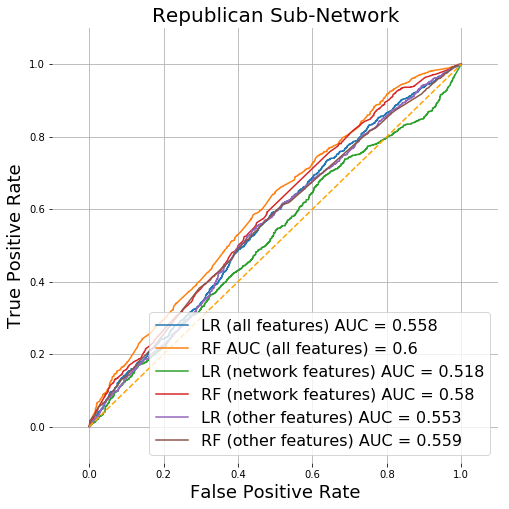

In [113]:
#REP

# All features:------------------------------------------------------------------------------
clf_lg = LogisticRegression().fit(X_rep_allF_train, y_rep_train)
pred_log = clf_lg.predict(X_rep_allF_test)
pred_proba_log = clf_lg.predict_proba(X_rep_allF_test)[:,1]

clf_rf = RandomForestClassifier(max_depth=5, random_state=0).fit(X_rep_allF_train, y_rep_train)
pred_rf = clf_rf.predict(X_rep_allF_test)
pred_proba_rf = clf_rf.predict_proba(X_rep_allF_test)[:,1]

#Logistic regression
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_rep_test, pred_proba_log)
auc1 = round(metrics.roc_auc_score(y_rep_test, pred_proba_log), 3)

#Random forrest
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_rep_test, pred_proba_rf)
auc2 = round(metrics.roc_auc_score(y_rep_test, pred_proba_rf), 3)


# Network features: ----------------------------------------------------------------------------
clfN_lg = LogisticRegression().fit(X_rep_NF_train, y_rep_train)
predN_log = clfN_lg.predict(X_rep_NF_test)
pred_probaN_log = clfN_lg.predict_proba(X_rep_NF_test)[:,1]

clfN_rf = RandomForestClassifier(max_depth=5, random_state=0).fit(X_rep_NF_train, y_rep_train)
predN_rf = clfN_rf.predict(X_rep_NF_test)
pred_probaN_rf = clfN_rf.predict_proba(X_rep_NF_test)[:,1]

#Logistic regression
fprN1, tprN1, thresholdsN1 = metrics.roc_curve(y_rep_test, pred_probaN_log)
aucN1 = round(metrics.roc_auc_score(y_rep_test, pred_probaN_log), 3)

#Random forrest
fprN2, tprN2, thresholdsN2 = metrics.roc_curve(y_rep_test, pred_probaN_rf)
aucN2 = round(metrics.roc_auc_score(y_rep_test, pred_probaN_rf), 3)

# "Other" features: ----------------------------------------------------------------------------
clfO_lg = LogisticRegression().fit(X_rep_OF_train, y_rep_train)
predO_log = clfO_lg.predict(X_rep_OF_test)
pred_probaO_log = clfO_lg.predict_proba(X_rep_OF_test)[:,1]

clfO_rf = RandomForestClassifier(max_depth=5, random_state=0).fit(X_rep_OF_train, y_rep_train)
predO_rf = clfO_rf.predict(X_rep_OF_test)
pred_probaO_rf = clfO_rf.predict_proba(X_rep_OF_test)[:,1]

#Logistic regression
fprO1, tprO1, thresholdsO1 = metrics.roc_curve(y_rep_test, pred_probaO_log)
aucO1 = round(metrics.roc_auc_score(y_rep_test, pred_probaO_log), 3)

#Random forrest
fprO2, tprO2, thresholdsO2 = metrics.roc_curve(y_rep_test, pred_probaO_rf)
aucO2 = round(metrics.roc_auc_score(y_rep_test, pred_probaO_rf), 3)


plt.figure(figsize=[8,8])

plt.plot(fpr1, tpr1, label = "LR (all features) AUC = " + str(auc1))
plt.plot(fpr2, tpr2, label = "RF AUC (all features) = " + str(auc2))

plt.plot(fprN1, tprN1, label = "LR (network features) AUC = " + str(aucN1))
plt.plot(fprN2, tprN2, label = "RF (network features) AUC = " + str(aucN2))

plt.plot(fprO1, tprO1, label = "LR (other features) AUC = " + str(aucO1))
plt.plot(fprO2, tprO2, label = "RF (other features) AUC = " + str(aucO2))

plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), linestyle = "dashed", color = "orange")

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
#plt.title('ROC curve', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.grid(True)

plt.legend(fontsize = 16)
sns.despine(left=True, bottom= True)

plt.title("Republican Sub-Network", fontsize = 20)

plt.savefig('roc_rep_new.pdf', bbox_inches="tight")

plt.show()